<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Importation de la librairie plotly express
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [4]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")

c:\USERS\SKIKK\APPDATA\LOCAL\PROGRAMS\PYTHON\PYTHON313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\USERS\SKIKK\APPDATA\LOCAL\PROGRAMS\PYTHON\PYTHON313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\USERS\SKIKK\APPDATA\LOCAL\PROGRAMS\PYTHON\PYTHON313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [5]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [6]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
purchase_price    float64
dtype: object

In [7]:
#Afficher les 5 premières lignes de la table
df_erp.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,instock,23.77


In [8]:
# Vérifier si il y a les lignes en doublons dans la colonne product_id
duplicates_in_column = df_erp[df_erp['product_id'].duplicated(keep=False)]
if not duplicates_in_column.empty:
    print("Duplicates in column 'product_id':")
    print(duplicates_in_column)
else:
    print("No duplicates found in column 'product_id'.")

No duplicates found in column 'product_id'.


In [9]:
# Afficher les valeurs distinctes de la colonne stock_status
distinct_values = df_erp['stock_status'].unique()
# Print the distinct values
print("Distinct values in 'stock_status':")
print(distinct_values)

# Afficher les colonnes liées à stock_status
related_columns = df_erp.groupby('stock_status')['stock_quantity'].unique()
print("Related columns to 'stock_status':")
print(related_columns)

Distinct values in 'stock_status':
['instock' 'outofstock']
Related columns to 'stock_status':
stock_status
instock       [16, 10, 26, 3, 12, 15, 5, 2, 24, 25, 42, 7, 6...
outofstock                                         [0, -10, -1]
Name: stock_quantity, dtype: object


In [10]:
# Création d'une colonne "stock_status_2"
# La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
# si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp['stock_status_2'] = df_erp['stock_quantity'].apply(lambda x: 'outofstock' if x <= 0 else 'instock')

# Afficher les premières lignes du dataframe pour vérifier
df_erp.head(5)


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
0,3847,1,24.2,16,instock,12.88,instock
1,3849,1,34.3,10,instock,17.54,instock
2,3850,1,20.8,0,outofstock,10.64,outofstock
3,4032,1,14.1,26,instock,6.92,instock
4,4039,1,46.0,3,instock,23.77,instock


In [11]:
# Vérifions que les 2 colonnes sont identiques
# Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
# La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
comparison = df_erp["stock_status"] == df_erp["stock_status_2"]

# Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
# C'est un bon début, mais difficile à exploiter

# Vérifier si toutes les valeurs sont identiques
if comparison.all():
    print("Les colonnes 'stock_status' et 'stock_status_2' sont strictement identiques.")
else:
    print("Les colonnes 'stock_status' et 'stock_status_2' ne sont pas identiques.")
    # Afficher les lignes où les colonnes ne sont pas identiques
    print("Lignes avec des différences:")
    print(df_erp[~comparison])


Les colonnes 'stock_status' et 'stock_status_2' sont strictement identiques.


In [12]:
# Vérifions que les 2 colonnes sont identiques
is_true_column = df_erp['stock_status'] == df_erp['stock_status_2']

# Effectuer la somme de cette colonne
sum_true = is_true_column.sum()

# Nombre total de lignes dans le dataset
total_rows = df_erp.shape[0]

# Afficher le résultat
print(f"The sum of the boolean column is: {sum_true}")
if sum_true == total_rows:
    print(f"Les colonnes 'stock_status' et 'stock_status_2' sont strictement identiques. La somme est {sum_true}.")
else:
    print(f"Les colonnes 'stock_status' et 'stock_status_2' ne sont pas identiques. La somme est {sum_true} sur {total_rows} lignes.")


The sum of the boolean column is: 825
Les colonnes 'stock_status' et 'stock_status_2' sont strictement identiques. La somme est 825.


In [13]:
# Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
mismatched_status = df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]

# Afficher les lignes avec des différences
print("Lignes avec des différences entre 'stock_status' et 'stock_status_2':")
print(mismatched_status)

Lignes avec des différences entre 'stock_status' et 'stock_status_2':
Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price, stock_status_2]
Index: []


In [14]:
#Corriger la ou les données incohérentes

#Verification en utilisant le même code que plus haut pour afficher les problemes


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [15]:
###############
## LES PRIX  ##
###############
# Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?

# Afficher le ou les prix non renseignés dans la colonne "price"
missing_prices = df_erp['price'].isnull().sum()
print("Nombres d'articles avec un prix non renseigné: {}".format(missing_prices))

# Afficher le prix minimum de la colonne "price"
min_price = df_erp['price'].min()
print("Prix minimum: {}".format(min_price))

# Afficher le prix maximum de la colonne "price"
max_price = df_erp['price'].max()
print("Prix maximum: {}".format(max_price))

# Afficher les prix inférieurs à 0 (qu'est-ce qu'il faut en faire ?)
negative_prices = df_erp[df_erp['price'] < 0]
print("Prix inférieurs à 0:")
print(negative_prices)

# Remplacer les prix négatifs par leurs valeurs absolues
df_erp.loc[df_erp['price'] < 0, 'price'] = df_erp['price'].abs()



Nombres d'articles avec un prix non renseigné: 0
Prix minimum: -20.0
Prix maximum: 225.0
Prix inférieurs à 0:
     product_id  onsale_web  price  stock_quantity stock_status  \
151        4233           0  -20.0               0   outofstock   
469        5017           0   -8.0               0   outofstock   
739        6594           0   -9.1              19      instock   

     purchase_price stock_status_2  
151           10.33     outofstock  
469            4.34     outofstock  
739            4.61        instock  


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [16]:
#######################
### stock_quantity  ###
#######################

# Vérification de la colonne stock quantity

# Afficher la quantité minimum de la colonne "stock_quantity"
min_quantity = df_erp['stock_quantity'].min()
print("Quantité minimum: {}".format(min_quantity))

# Afficher la quantité maximum de la colonne "stock_quantity"
max_quantity = df_erp['stock_quantity'].max()
print("Quantité maximum: {}".format(max_quantity))

# Afficher les stocks inférieurs à 0 (qu'est-ce qu'il faut en faire ?)
negative_stocks = df_erp[df_erp['stock_quantity'] < 0]
print("Stocks inférieurs à 0:")
print(negative_stocks)

# Optionnel: Remplacer les stocks négatifs par 0 ou une autre valeur
df_erp.loc[df_erp['stock_quantity'] < 0, 'stock_quantity'] = 0



Quantité minimum: -10
Quantité maximum: 145
Stocks inférieurs à 0:
     product_id  onsale_web  price  stock_quantity stock_status  \
449        4973           0   10.0             -10   outofstock   
573        5700           1   44.5              -1   outofstock   

     purchase_price stock_status_2  
449            4.96     outofstock  
573           22.30     outofstock  


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [17]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
unique_values = df_erp['onsale_web'].unique()
print("Unique values in 'onsale_web':", unique_values)


Unique values in 'onsale_web': [1 0]


In [18]:
#Quelles sont les colonnes à conserver selon vous?
#avec 1 

In [19]:
#Supprimer la colonnecomportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".
df_erp = df_erp.drop(columns=['stock_status_2'])

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [20]:
######################
##   prix d'achat   ##
######################

# Vérification de la colonne purchase_price

# Afficher le ou les prix non renseignés dans la colonne "purchase_price"
missing_prices = df_erp['purchase_price'].isnull().sum()
print("Nombres d'article avec un prix non renseignés: {}".format(missing_prices))

# Afficher le prix minimum de la colonne "purchase_price"
min_price = df_erp['purchase_price'].min()
print("Prix minimum: {}".format(min_price))

# Afficher le prix maximum de la colonne "purchase_price"
max_price = df_erp['purchase_price'].max()
print("Prix maximum: {}".format(max_price))



Nombres d'article avec un prix non renseignés: 0
Prix minimum: 2.74
Prix maximum: 137.81


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [21]:

# Get the dimensions of the dataset
dimensions = df_web.shape

# Number of observations (rows)
num_observations = dimensions[0]
print("Nombre d'observations: {}".format(num_observations))

# Number of characteristics (columns)
num_characteristics = dimensions[1]
print("Nombre de caractéristiques: {}".format(num_characteristics))



Nombre d'observations: 1513
Nombre de caractéristiques: 29


In [22]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_web.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           1429 non-null   object        
 13  pos

In [23]:
#Selon vous, quelles sont les colonnes à conserver ?
#sku , total_sales , tax_status , product type , post_title , post_date_gmt 
#post_modified , post_name , prost_type

In [24]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération

# List of columns to keep
columns_to_keep = ['sku', 'total_sales', 'tax_status', 'product_type', 'post_title', 'post_date_gmt', 'post_modified', 'post_name', 'post_type']

# Keep only the specified columns
df_web = df_web[columns_to_keep]

# Display the DataFrame
df_web.head(5)
df_web.describe()


,total_sales,post_date_gmt,post_modified
count,1430.000000,1430,1430
mean,8.223077,2018-08-22 01:53:30.097902080,2020-06-20 13:59:29.781818112
min,-56.000000,2018-02-08 11:58:52,2018-02-20 15:19:23
25%,5.000000,2018-02-27 19:01:12.500000,2020-06-18 10:45:05.249999872
50%,8.000000,2018-04-19 12:56:05,2020-08-04 09:30:06
75%,11.000000,2019-01-31 13:35:47,2020-08-25 10:32:32
max,122.000000,2020-07-20 09:00:00,2020-08-27 18:55:03
std,6.721899,NaN,NaN


In [25]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
#il doit etre unique
#il faut avoir 5 chiffres dans la colum sku
df_web.isna().sum()
df_web = df_web.dropna(how='all', axis='rows').reset_index(drop=True)

In [26]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?


In [27]:
#Identifier les lignes sans code articles
df_web.loc[df_web['sku'].isna() & ~df_web['total_sales'].isna()]

,sku,total_sales,tax_status,product_type,post_title,post_date_gmt,post_modified,post_name,post_type
1019,NaN,-56.0,taxable,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,2018-08-08 09:23:43,2019-11-02 13:24:01,pierre-jean-villa-condrieu-suspendu-2018,product
1021,NaN,-17.0,taxable,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,2018-07-31 10:07:23,2019-11-02 13:24:15,pierre-jean-villa-cote-rotie-fongeant-2017,product


In [28]:
# Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre

# Identifier les lignes avec 'sku' manquant mais 'total_sales' non manquant
df_na_web = df_web.loc[df_web['sku'].isna() & ~df_web['total_sales'].isna()]

# Trouver les titres correspondants
matching_titles = df_web[df_web['post_title'].isin(df_na_web['post_title'])]

# Afficher les lignes avec 'post_title' correspondant
print("\nRows with matching 'post_title':")
print(matching_titles)

# Mettre à jour le 'sku' pour un titre spécifique
df_web.loc[df_web['post_title'] == 'Clos du Mont-Olivet Châteauneuf-du-Pape 2007', 'sku'] = 16034

# Supprimer les lignes avec 'sku' manquant et réinitialiser l'index
df_web = df_web.dropna(subset=['sku']).reset_index(drop=True)


Rows with matching 'post_title':
      sku  total_sales tax_status product_type  \
1019  NaN        -56.0    taxable          Vin   
1021  NaN        -17.0    taxable          Vin   

                                           post_title       post_date_gmt  \
1019  Pierre Jean Villa Condrieu Jardin Suspendu 2018 2018-08-08 09:23:43   
1021       Pierre Jean Villa Côte Rôtie Fongeant 2017 2018-07-31 10:07:23   

           post_modified                                   post_name post_type  
1019 2019-11-02 13:24:01    pierre-jean-villa-condrieu-suspendu-2018   product  
1021 2019-11-02 13:24:15  pierre-jean-villa-cote-rotie-fongeant-2017   product  


In [29]:
# La clé pour chaque ligne est-elle unique? ou autrement dit, y a-t-il des doublons?
taux_doublons_df_web = df_web['sku'].nunique() / df_web['sku'].size

print(f'{(1 - taux_doublons_df_web):.2%} des lignes du DataFrame sont des doublons.')

# Supprimer la variable taux_doublons_df_web
del taux_doublons_df_web


50.07% des lignes du DataFrame sont des doublons.


In [30]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:

#1 - Créer un dataframe avec uniquement les lignes sans code article
# Sélection aléatoire d'une ligne
random_index = np.random.randint(0, len(df_liaison['product_id']))

# Sélection SKU à partir de l'index de la ligne aléatoire
random_sku = df_web['sku'].iloc[random_index]

# Affichage des deux lignes en doublons
df_web.loc[df_web['sku'] == random_sku]
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
df_web.info()
#3 - Que constatez-vous?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sku            1428 non-null   object        
 1   total_sales    1428 non-null   float64       
 2   tax_status     714 non-null    object        
 3   product_type   1427 non-null   object        
 4   post_title     1428 non-null   object        
 5   post_date_gmt  1428 non-null   datetime64[ns]
 6   post_modified  1428 non-null   datetime64[ns]
 7   post_name      1428 non-null   object        
 8   post_type      1428 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 100.5+ KB


In [31]:
# Filtrer les lignes où 'post_type' n'est pas 'attachment' et créer une copie du DataFrame
df_web = df_web.loc[df_web['post_type'] != 'attachment'].copy()

# Afficher les 3 premières lignes du DataFrame
df_web.head(3)

,sku,total_sales,tax_status,product_type,post_title,post_date_gmt,post_modified,post_name,post_type
2,14692,5.0,taxable,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,2019-03-19 09:06:47,2020-04-25 21:40:31,fonreaud-bordeaux-blanc-le-cygne-2016,product
4,15328,2.0,taxable,Vin,Agnès Levet Côte Rôtie Maestria 2017,2019-03-27 17:05:09,2020-07-25 15:45:02,agnes-levet-cote-rotie-maestria-2017,product
6,16515,10.0,taxable,Vin,Château Turcaud Bordeaux Rouge Cuvée Majeure 2018,2018-06-02 07:31:31,2020-08-27 10:11:12,chateau-turcaud-bordeaux-rouge-cuvee-majeure-2018,product


In [32]:
df_web.nunique()


sku              713
total_sales       24
tax_status         1
product_type       6
post_title       711
post_date_gmt    714
post_modified    587
post_name        714
post_type          1
dtype: int64

In [33]:
# Check for duplicate SKUs
duplicate_skus = df_web[df_web['sku'].duplicated(keep=False)]

# Display rows with non-unique SKUs
print("\nRows with non-unique SKUs:")
print(duplicate_skus)

# Filtrer les lignes où 'post_type' n'est pas 'attachment' et créer une copie du DataFrame
df_web = df_web.loc[df_web['post_type'] != 'attachment'].copy()


Rows with non-unique SKUs:
       sku  total_sales tax_status product_type  \
251  16034          4.0    taxable          Vin   
919  16034          8.0    taxable          Vin   

                                       post_title       post_date_gmt  \
251  Clos du Mont-Olivet Châteauneuf-du-Pape 2007 2020-06-09 13:42:04   
919  Clos du Mont-Olivet Châteauneuf-du-Pape 2007 2018-09-25 13:35:26   

          post_modified                                       post_name  \
251 2020-07-20 17:09:06  clos-du-mont-olivet-chateauneuf-du-pape-2007-2   
919 2020-08-21 14:25:03    clos-du-mont-olivet-chateauneuf-du-pape-2007   

    post_type  
251   product  
919   product  


In [34]:
df_web.info()
df_web.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 2 to 1424
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sku            714 non-null    object        
 1   total_sales    714 non-null    float64       
 2   tax_status     714 non-null    object        
 3   product_type   713 non-null    object        
 4   post_title     714 non-null    object        
 5   post_date_gmt  714 non-null    datetime64[ns]
 6   post_modified  714 non-null    datetime64[ns]
 7   post_name      714 non-null    object        
 8   post_type      714 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 55.8+ KB


,sku,total_sales,tax_status,product_type,post_title,post_date_gmt,post_modified,post_name,post_type
2,14692,5.0,taxable,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,2019-03-19 09:06:47,2020-04-25 21:40:31,fonreaud-bordeaux-blanc-le-cygne-2016,product
4,15328,2.0,taxable,Vin,Agnès Levet Côte Rôtie Maestria 2017,2019-03-27 17:05:09,2020-07-25 15:45:02,agnes-levet-cote-rotie-maestria-2017,product
6,16515,10.0,taxable,Vin,Château Turcaud Bordeaux Rouge Cuvée Majeure 2018,2018-06-02 07:31:31,2020-08-27 10:11:12,chateau-turcaud-bordeaux-rouge-cuvee-majeure-2018,product
10,16585,15.0,taxable,Vin,Xavier Frissant Touraine Sauvignon 2019,2018-02-16 13:03:16,2020-08-27 09:30:36,xavier-frissant-touraine-sauvignon-2019,product
13,12869,7.0,taxable,Vin,Stéphane Tissot Arbois D.D. 2016,2019-03-28 13:29:35,2019-12-13 15:40:01,stephane-tissot-arbois-dd-2016,product


In [35]:
# Renommer la colonne 'sku' en 'id_web'
df_web.rename(columns={'sku': 'id_web'}, inplace=True)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [36]:
# Dimension du dataset
# Nombre d'observations
num_observations = df_liaison.shape[0]

# Nombre de caractéristiques
num_characteristics = df_liaison.shape[1]

# Afficher les résultats
print("Number of observations:", num_observations)
print("Number of characteristics:", num_characteristics)

Number of observations: 825
Number of characteristics: 2


In [37]:
# Nombre de colonnes 
num_columns = df_liaison.shape[1] 
print("Nombre de colonnes:", num_columns) 
# Nature des données dans chacune des colonnes 
data_types = df_liaison.dtypes 
print("\nNature des données dans chacune des colonnes:") 
print(data_types) 
# Nombre de valeurs présentes dans chacune des colonnes 
num_values = df_liaison.count() 
print("\nNombre de valeurs présentes dans chacune des colonnes:") 
print(num_values)

Nombre de colonnes: 2

Nature des données dans chacune des colonnes:
id_web        object
product_id     int64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes:
id_web        734
product_id    825
dtype: int64


In [38]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
unique_product_ids = df_liaison['product_id'].is_unique 
print("Les valeurs de la colonne 'product_id' sont-elles toutes uniques ?", unique_product_ids) 

Les valeurs de la colonne 'product_id' sont-elles toutes uniques ? True


In [39]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
unique_product_ids = df_liaison['id_web'].is_unique 
print("Les valeurs de la colonne 'id_web' sont-elles toutes uniques ?", unique_product_ids) 
# Identify non-unique product_ids 
non_unique_product_ids = df_liaison[df_liaison['id_web'].duplicated(keep=False)]
# Display rows with non-unique product_ids 
print("\nRows with non-unique product_ids:") 
print(non_unique_product_ids)

Les valeurs de la colonne 'id_web' sont-elles toutes uniques ? False

Rows with non-unique product_ids:
    id_web  product_id
19     NaN        4055
49     NaN        4090
50     NaN        4092
119    NaN        4195
131    NaN        4209
151    NaN        4233
184    NaN        4278
185    NaN        4279
234    NaN        4565
238    NaN        4577
239    NaN        4578
242    NaN        4594
246    NaN        4599
292    NaN        4659
318    NaN        4692
319    NaN        4693
320    NaN        4697
321    NaN        4698
322    NaN        4702
340    NaN        4721
352    NaN        4738
356    NaN        4744
384    NaN        4798
396    NaN        4874
416    NaN        4911
449    NaN        4973
469    NaN        5017
472    NaN        5020
486    NaN        5070
487    NaN        5075
541    NaN        5560
547    NaN        5569
618    NaN        5805
621    NaN        5808
659    NaN        5952
696    NaN        6125
724    NaN        6324
726    NaN        6327

In [40]:
#Avons-nous des articles sans correspondances?

#oui


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [41]:
#Fusion des fichiers df_erp et df_liaison
df_final = pd.merge((df_erp), (df_liaison), on = ['product_id'], how = 'outer')
df_final.head(3)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web
0,3847,1,24.2,16,instock,12.88,15298
1,3849,1,34.3,10,instock,17.54,15296
2,3850,1,20.8,0,outofstock,10.64,15300


In [42]:
# Y a-t-il des lignes ne "matchant" pas entre les 2 fichiers?

# Compter le nombre de valeurs manquantes dans chaque colonne du DataFrame fusionné
missing_values = df_final.isna().sum()

# Afficher les résultats
print(missing_values)

product_id         0
onsale_web         0
price              0
stock_quantity     0
stock_status       0
purchase_price     0
id_web            91
dtype: int64


In [43]:
df_final.nunique()

product_id        825
onsale_web          2
price             381
stock_quantity     82
stock_status        2
purchase_price    660
id_web            734
dtype: int64

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [44]:
# Fusionner les datasets df_final et df_web
df_final = pd.merge(df_final, df_web, on='id_web', how='outer')

# Afficher les 3 premières lignes du DataFrame fusionné
df_final.head(3)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,total_sales,tax_status,product_type,post_title,post_date_gmt,post_modified,post_name,post_type
0,4729,1,8.6,26,instock,4.22,38,10.0,taxable,Vin,Emile Boeckel Crémant Brut Blanc de Blancs,2018-04-18 10:25:58,2020-08-27 17:15:03,emile-boeckel-cremant-brut-blanc-de-blancs,product
1,4634,1,41.0,11,instock,20.12,41,6.0,taxable,Vin,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,2018-04-14 10:01:43,2020-08-03 10:25:02,marcel-windholtz-eau-de-marc-de-gewurztraminer,product
2,4141,1,39.0,123,instock,24.86,304,8.0,taxable,Champagne,Champagne Gosset Grande Réserve,2018-02-13 11:57:44,2020-08-27 11:25:02,gosset-champagne-grande-reserve,product


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

In [45]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas


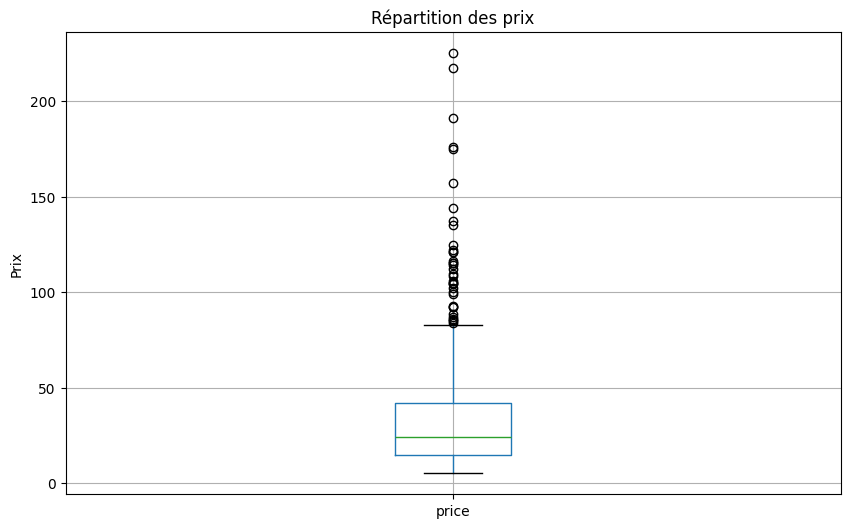

In [46]:
#Autre méthode avec plotly express
plt.figure(figsize=(10, 6)) 
df_final.boxplot(column='price') 
plt.title('Répartition des prix') 
plt.ylabel('Prix') 
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [47]:
#Calculer la moyenne du prix
price_mode = df_final['price'].mode()
price_mean = df_final['price'].mean()
price_median = df_final['price'].median()

print(
    f'Mode : {price_mode}\nMoyenne : {price_mean:.2f}\nMédiane : {price_median}')

del price_mode, price_mean, price_median

price_mini = df_final['price'].min()
price_maxi = df_final['price'].max()

print(f'Les prix s\'étendent de : {price_mini} € à {price_maxi} €.')

del price_mini, price_maxi
#Calculer l'écart-type du prix
variance = df_final['price'].var(ddof=0)
ecart_type = df_final['price'].std(ddof=0)

print(f'Variance : {variance:.2f}\nEcart-type : {ecart_type:.2f}')

del variance, ecart_type
#Calculer le Z-score
df_final['z_score'] = (df_final['price'] - df_final['price'].mean()) / df_final['price'].std(ddof=0)



Mode : 0    45.0
Name: price, dtype: float64
Moyenne : 32.30
Médiane : 24.35
Les prix s'étendent de : 5.2 € à 225.0 €.
Variance : 706.63
Ecart-type : 26.58


In [48]:
# Filtrer les prix dont le Z-score est supérieur à 3
prix_seuil = df_final[df_final['z_score'] > 3][['price', 'product_id', 'z_score', 'post_title']]

print(f'Les prix dont le Z-score est supérieur à 3 sont : {prix_seuil}')




Les prix dont le Z-score est supérieur à 3 sont :      price  product_id   z_score  \
24   176.0        4402  5.405626   
33   157.0        4406  4.690870   
87   115.0        6215  3.110884   
157  115.0        6212  3.110884   
171  137.0        4904  3.938496   
204  217.5        5001  6.966803   
233  114.0        5918  3.073265   
235  122.0        5917  3.374215   
256  124.8        5612  3.479547   
257  135.0        6126  3.863258   
269  191.3        5892  5.981192   
281  121.0        6216  3.336596   
282  121.0        6213  3.336596   
291  116.4        6202  3.163550   
313  175.0        5767  5.368007   
567  225.0        4352  7.248943   
746  144.0        4594  4.201827   

                                            post_title  
24                                Cognac Frapin VIP XO  
33   Cognac Frapin Château de Fontpinot 1989 20 Ans...  
87   Domaine des Comtes Lafon Volnay 1er Cru Champa...  
157  Domaine des Comtes Lafon Volnay 1er Cru Santen...  
171  Domaine Des

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [49]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
description = df_final['price'].describe() 
print(description)



count    826.000000
mean      32.304903
std       26.598615
min        5.200000
25%       14.525000
50%       24.350000
75%       42.000000
max      225.000000
Name: price, dtype: float64


In [50]:
#Définissez un seuil pour les articles "outliers" en prix
Q1 = df_final['price'].quantile(0.25)
Q3 = df_final['price'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1
outliers = df_final[(df_final['price'] < (Q1 - 1.5 * IQR)) | (df_final['price'] > (Q3 + 1.5 * IQR))]

print(f'Les articles considérés comme des outliers en termes de prix sont : {outliers}')


Les articles considérés comme des outliers en termes de prix sont :      product_id  onsale_web  price  stock_quantity stock_status  \
22         4404           1  108.5              17      instock   
23         4407           1  104.0              14      instock   
24         4402           1  176.0              11      instock   
33         4406           1  157.0              12      instock   
53         6214           1   99.0               9      instock   
54         5008           1  105.0              12      instock   
56         4132           1   88.4               7      instock   
87         6215           1  115.0              14      instock   
88         5007           1  105.0              15      instock   
89         4582           1  109.6              18      instock   
143        4359           1   85.6             112      instock   
149        5026           1   86.8             101      instock   
150        5025           1  112.0             136      insto

In [51]:
# Number of outlier articles
nombre_outliers = outliers.shape[0]

# Proportion of outliers relative to the entire catalog
proportion_outliers = nombre_outliers / df_final.shape[0]

print(f'Nombre d\'articles outliers : {nombre_outliers}')
print(f'Proportion des outliers : {proportion_outliers:.2%}')

Nombre d'articles outliers : 36
Proportion des outliers : 4.36%


In [52]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
# Comparer les prix des outliers avec la moyenne des prix des produits similaires
'oui parce que ce sont des grandes crues ou des alcoholes fort'



'oui parce que ce sont des grandes crues ou des alcoholes fort'

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [53]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article
df_final['ca_par_article'] = df_final['price'] * df_final['total_sales']

#Calculez la somme de la colonne "ca_par_article"
ca_total = df_final['ca_par_article'].sum()

#Afficher le chiffre d'affaire total du site web

print(f'Le chiffre d\'affaire total du site web est de : {ca_total:.2f} ')
#Ce résultat correspond au chiffre d'affaire du site web


Le chiffre d'affaire total du site web est de : 143680.10 


In [54]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_final['ca_par_article'] = df_final['ca_par_article'].astype(float)


#Réinitialiser l'index du dataset par un reset_index
df_final = df_final.reset_index(drop=True)

#Afficher les 20 premier articles en CA
df_final = df_final.sort_values(by='ca_par_article', ascending=False)

df_final.head(20)



# Trier les articles par CA décroissant et sélectionner les 20 premiers
top_20_articles = df_final.sort_values(by='ca_par_article', ascending=False).head(20)

# Ajouter une colonne de classement
top_20_articles['ranking'] = range(1, len(top_20_articles) + 1)

# Créer le graphique en barre avec des barres plus épaisses et une largeur maximale
fig = px.bar(top_20_articles, x='ranking', y='ca_par_article', title='Top 20 articles en CA')

# Ajuster la mise en page pour définir une largeur maximale
fig.update_layout(bargap=0.2, bargroupgap=0.1, width=1000)  # Ajustez les valeurs selon vos besoins

# Afficher le graphique
fig.show()







In [55]:
top_20_articles.head(20)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,total_sales,tax_status,product_type,post_title,post_date_gmt,post_modified,post_name,post_type,z_score,ca_par_article,ranking
567,4352,1,225.0,0,outofstock,137.81,15940,11.0,taxable,Champagne,Champagne Egly-Ouriet Grand Cru Millésimé 2008,2018-03-02 09:30:04,2020-03-07 11:18:45,champagne-egly-ouriet-grand-cru-millesime-2008,product,7.248943,2475.0,1
269,5892,1,191.3,98,instock,116.06,14983,6.0,taxable,Champagne,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,2019-03-28 09:21:36,2020-04-01 09:30:09,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,product,5.981192,1147.8,2
77,4353,1,79.5,127,instock,45.91,12587,14.0,taxable,Champagne,Champagne Egly-Ouriet Grand Cru Brut Rosé,2018-03-02 09:37:26,2020-08-22 11:45:02,champagne-egly-ouriet-grand-cru-brut-rose,product,1.775419,1113.0,3
349,5826,1,41.2,34,instock,21.71,15325,20.0,taxable,Vin,Agnès Levet Côte Rôtie Améthyste 2017,2019-03-27 16:59:49,2020-05-21 14:00:02,agnes-levet-amethyste-2017,product,0.334622,824.0,4
157,6212,1,115.0,16,instock,59.42,13996,7.0,taxable,Vin,Domaine des Comtes Lafon Volnay 1er Cru Santen...,2019-07-25 07:09:17,2020-06-16 09:30:16,domaine-des-comtes-lafon-volnay-1er-cru-santen...,product,3.110884,805.0,5
149,5026,1,86.8,101,instock,50.13,13913,9.0,taxable,Champagne,Champagne Agrapart &amp; Fils Minéral Extra Br...,2018-07-18 08:46:30,2020-05-11 14:35:02,champagne-agrapart-fils-mineral-extra-brut-bla...,product,2.050036,781.2,6
54,5008,1,105.0,12,instock,56.42,11602,7.0,taxable,Vin,Domaine des Comtes Lafon Volnay 1er Cru Santen...,2018-07-17 08:52:41,2020-06-23 15:35:02,domaine-des-comtes-lafon-volnay-1er-cru-santen...,product,2.734697,735.0,7
313,5767,1,175.0,12,instock,90.42,15185,4.0,taxable,Vin,Camille Giroud Clos de Vougeot 2016,2019-03-13 13:43:22,2020-06-11 15:25:04,camille-giroud-clos-de-vougeot-2016,product,5.368007,700.0,8
257,6126,1,135.0,138,instock,80.33,14923,5.0,taxable,Champagne,Champagne Gosset Célébris Vintage 2007,2019-06-28 15:22:27,2020-08-27 11:45:02,champagne-gosset-celebris-vintage-2007,product,3.863258,675.0,9
150,5025,1,112.0,136,instock,68.60,13914,6.0,taxable,Champagne,Champagne Agrapart &amp; Fils L'Avizoise Extra...,2018-07-18 08:39:43,2020-07-09 17:05:02,champagne-agrapart-fils-lavizoise-grand-cru-20...,product,2.998028,672.0,10


In [56]:
#############################
# Calculer le 20 / 80 en CA #
#############################

# Créer une colonne calculant la part du CA de la ligne dans le dataset
df_final['%_ca_par_article'] = df_final['ca_par_article'] / df_final['ca_par_article'].sum()

# Créer une colonne réalisant la somme cumulative de la colonne précédemment créée
df_final['somme_cumulative'] = df_final['%_ca_par_article'].cumsum()

# Calculer le nombre d'articles représentant 80% des ventes en CA
articles_80_ca = df_final[df_final['somme_cumulative'] <= 0.80]
nombre_articles_80_ca = articles_80_ca.shape[0]

# Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
proportion_articles_80_ca = nombre_articles_80_ca / df_final.shape[0]

print(f'Nombre d\'articles représentant 80% des ventes en CA : {nombre_articles_80_ca}')
print(f'Proportion de ces articles dans le catalogue entier : {proportion_articles_80_ca:.2%}')



Nombre d'articles représentant 80% des ventes en CA : 434
Proportion de ces articles dans le catalogue entier : 52.54%


In [57]:
# Supprimer le DataFrame top_20_articles
del top_20_articles


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [58]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_final = df_final.sort_values(by='total_sales', ascending=False)

#Réinitialiser l'index du dataset par un reset_index
df_final = df_final.reset_index(drop=True)

#Afficher les 20 premiers articles en quantité
print(df_final.head(20))

#Graphique en barre des 20 premiers articles avec plotly express


# Trier les articles par quantité vendue décroissante et sélectionner les 20 premiers
top_20_articles = df_final.head(20)

# Ajouter une colonne de classement
top_20_articles['ranking'] = range(1, len(top_20_articles) + 1)

# Créer le graphique en barre avec des barres plus épaisses et une largeur maximale
fig = px.bar(top_20_articles, x='ranking', y='total_sales', title='Top 20 articles en quantité')

# Ajuster la mise en page pour définir une largeur maximale
fig.update_layout(bargap=0.2, bargroupgap=0.1, width=1000)  # Ajustez les valeurs selon vos besoins

# Afficher le graphique
fig.show()



    product_id  onsale_web  price  stock_quantity stock_status  \
0         4867           1    9.9             121      instock   
1         4203           1    9.9              74      instock   
2         4275           1   14.9              62      instock   
3         4726           1   12.7               0   outofstock   
4         4647           1   28.5              45      instock   
5         6129           1    5.2              68      instock   
6         5826           1   41.2              34      instock   
7         4220           1   11.6              48      instock   
8         5803           1   17.1              47      instock   
9         6569           1   29.0              58      instock   
10        5778           1    5.8              44      instock   
11        4863           1    8.2              54      instock   
12        5777           1    5.7              51      instock   
13        4870           1    9.3               0   outofstock   
14        

C:\Users\SKIKK\AppData\Local\Temp\ipykernel_15624\3342973474.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
#############################
# Calculer le 20 / 80 en CA #
#############################

# Créer une colonne calculant la part du CA de la ligne dans le dataset
df_final['%_total_sales'] = df_final['total_sales'] / df_final['total_sales'].sum()

# Créer une colonne réalisant la somme cumulative de la colonne précédemment créée
df_final['somme_cumulative_ts'] = df_final['%_total_sales'].cumsum()

# Calculer le nombre d'articles représentant 80% des ventes en CA
articles_80_ca_ts = df_final[df_final['somme_cumulative_ts'] <= 0.80]
nombre_articles_80_ca_ts = articles_80_ca_ts.shape[0]

# Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
proportion_articles_80_ca_ts = nombre_articles_80_ca_ts / df_final.shape[0]

print(f'Nombre d\'articles représentant 80% des ventes en CA : {nombre_articles_80_ca_ts}')
print(f'Proportion de ces articles dans le catalogue entier : {proportion_articles_80_ca_ts:.2%}')


Nombre d'articles représentant 80% des ventes en CA : 433
Proportion de ces articles dans le catalogue entier : 52.42%


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [60]:
df_final.head(3)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,total_sales,tax_status,product_type,post_title,post_date_gmt,post_modified,post_name,post_type,z_score,ca_par_article,%_ca_par_article,somme_cumulative,%_total_sales,somme_cumulative_ts
0,4867,1,9.9,121,instock,4.86,16148,36.0,taxable,Vin,Château De La Selve IGP Coteaux de l'Ardèche M...,2018-05-03 11:20:05,2020-08-27 09:30:15,chateau-de-la-selve-igp-coteaux-de-lardeche-ma...,product,-0.842844,356.4,0.002481,0.227993,0.006260,0.006260
1,4203,1,9.9,74,instock,5.01,15415,27.0,taxable,Vin,Mas Laval IGP Pays d'Hérault Les Pampres Blanc...,2018-02-15 13:33:42,2020-07-11 16:45:03,mas-laval-igp-pays-herault-pampres-blanc-2018,product,-0.842844,267.3,0.001860,0.402390,0.004695,0.010955
2,4275,1,14.9,62,instock,7.78,14864,24.0,taxable,Vin,I Fabbri Chianti Classico Lamole 2017,2018-02-27 12:33:54,2020-08-22 14:35:02,i-fabbri-chianti-classico-lamole-2017,product,-0.654750,357.6,0.002489,0.215575,0.004173,0.015128


C:\Users\SKIKK\AppData\Local\Temp\ipykernel_15624\1539939315.py:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





<Axes: xlabel='post_title'>

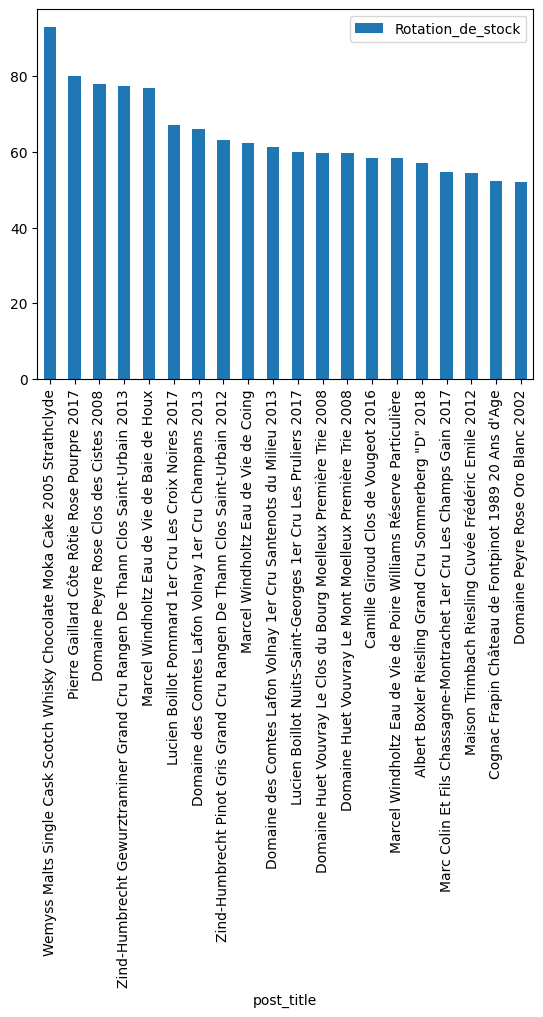

In [61]:
######################################
# Calcule le nombre de mois de stock #
######################################


#Création de la colonne Rotation de stock ca/stock_quantity

df_final['Rotation_de_stock'] = df_final['ca_par_article'] / df_final['stock_quantity']

#Remplacement des "inf" par 0

df_final['Rotation_de_stock'].replace(np.inf, 0, inplace=True)

#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df_final = df_final.sort_values(by='Rotation_de_stock', ascending=False)

#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock
df_final.head(20).plot(kind='bar', x='post_title', y='Rotation_de_stock')


In [62]:
####################################
# Valorisation des stocks en euros #
####################################

# Création de la colonne Valorisation des stocks en euros
df_final['stock_euro'] = df_final['stock_quantity'] * df_final['price']

# Calculer la somme de la colonne "stock_euro"
total_stock_value = df_final['stock_euro'].sum()

# Afficher la somme
print("Total valorisation des stocks en euros:", total_stock_value)

Total valorisation des stocks en euros: 532776.7


In [63]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

# Calculer la somme de la colonne stock_quantity
total_stock_quantity = df_final['stock_quantity'].sum()

# Afficher la somme
print("Total du nombre de produits en stock:", total_stock_quantity)

Total du nombre de produits en stock: 17834


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [64]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
#tva = 20%
df_final['HT'] = df_final.apply(lambda row: row['price'] / 1.2 if row['tax_status'] == 'taxable' else row['price'], axis=1)
  

#Création de la colonne Taux de marge

df_final['taux_marge'] = (df_final['HT'] - df_final['purchase_price']) / df_final['HT'] * 100

#Afficher le prix minimum de la colonne "taux_marge"
print(df_final['taux_marge'].min())

#Afficher le prix maximum de la colonne "taux_marge"
print(df_final['taux_marge'].max())




-634.98814229249
56.00464576074332


In [65]:
#affichage de la ligne avec un taux de marge inférieur à 0
print(df_final[df_final['taux_marge'] < 0])



     product_id  onsale_web  price  stock_quantity stock_status  \
701        4355           1  12.65              97      instock   
726        4864           0   8.30               0   outofstock   
771        6324           0  92.00              18      instock   
821        7196           0  31.00              55      instock   

     purchase_price id_web  total_sales tax_status product_type  \
701           77.48  12589          0.0    taxable    Champagne   
726            9.99  15154          NaN        NaN          NaN   
771           99.00    NaN          NaN        NaN          NaN   
821           31.20    NaN          NaN        NaN          NaN   

                                         post_title       post_date_gmt  \
701  Champagne Egly-Ouriet Grand Cru Blanc de Noirs 2018-03-02 09:46:10   
726                                             NaN                 NaT   
771                                             NaN                 NaT   
821                         

In [66]:
# Création d'un dataframe avec les taux positifs
df_positif = df_final[df_final['taux_marge'] > 0]

# Afficher le prix minimum de la colonne "taux_marge"
print(df_positif['taux_marge'].min())

# Afficher le prix maximum de la colonne "taux_marge"
print(df_positif['taux_marge'].max())




22.77862595419847
56.00464576074332


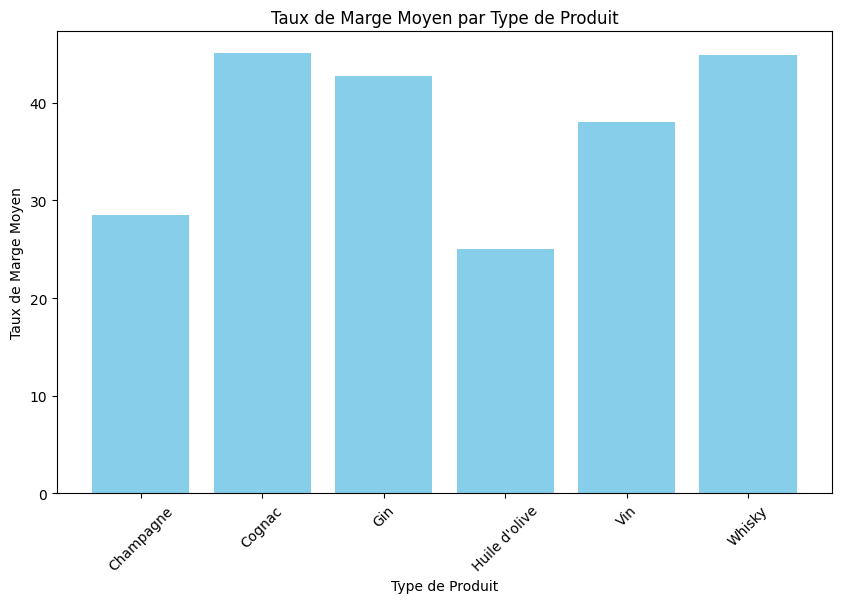

In [67]:
# Création d'un dataframe avec le taux de marge moyen par type de produit
df_moyenne = df_positif.groupby('product_type')['taux_marge'].mean().reset_index()

# Affichage dans un graphique du taux de marge par type de produit
plt.figure(figsize=(10, 6))
plt.bar(df_moyenne['product_type'], df_moyenne['taux_marge'], color='skyblue')
plt.xlabel('Type de Produit')
plt.ylabel('Taux de Marge Moyen')
plt.title('Taux de Marge Moyen par Type de Produit')
plt.xticks(rotation=45)
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

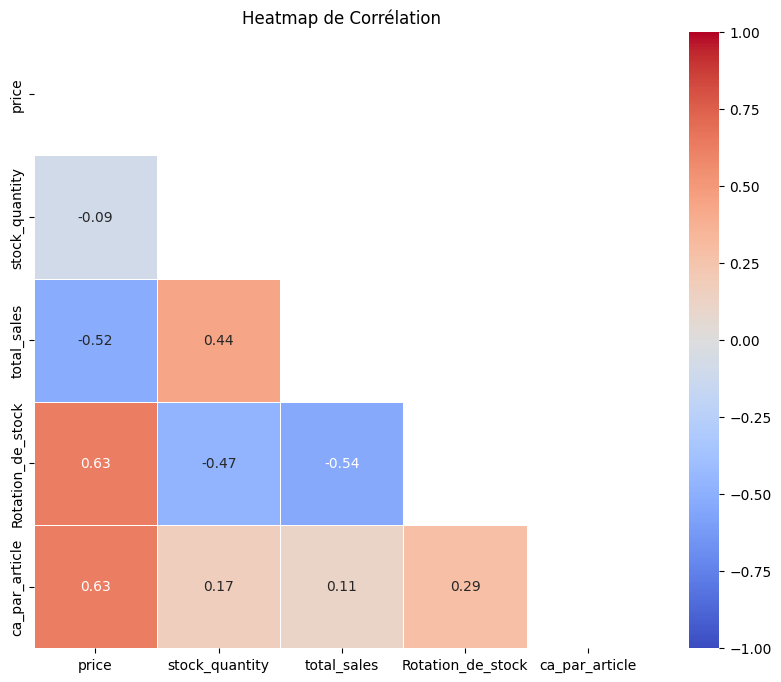

In [68]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn


# Calculate the correlation matrix
corr = df_final[['price', 'stock_quantity', 'total_sales', 'Rotation_de_stock', 'ca_par_article']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

plt.title('Heatmap de Corrélation')
plt.show()

In [69]:
#Que peut-on conclure des correlations ?

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [70]:
#Mettre le dataset df_merge sur un fichier Excel
df_final.to_excel('df_final.xlsx', index=False)
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  
